# Forward Feed Neural Network

The following project implements a simple forward-feed neural network to classify 10 distinct classes of digits ranging from 0 to 9. The model is trained on the MNIST dataset and emphasizes simplicity and clarity with a straightforward architecture structure. After 100 epochs of training, the model achieves a 91% accuracy rate on the data.

In [1]:
#Import dependencies
import torch    
import torch.nn as nn   
import torch.nn.functional as F
import torch.optim as optim    
from random import randint 
import time
import utils

In [2]:
#Load data
train_data=torch.load('../../data_copy/mnist/train_data.pt')
train_label=torch.load('../../data_copy/mnist/train_label.pt')

test_data=torch.load('../../data_copy/mnist/test_data.pt')
test_label=torch.load('../../data_copy/mnist/test_label.pt')

In [3]:
#Define class
class one_layer_net(nn.Module):    

    def __init__(self, input_size, output_size):    
        super().__init__()    
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):    
        scores = self.linear_layer(x)
        return scores    

In [4]:
#Instantiate class
net = one_layer_net(784,10)
print(net)    

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


In [5]:
utils.display_num_param(net)

There are 7840 (0.01 million) parameters in this neural network


In [6]:
#Net miscellaneous
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=200

In [7]:
#Evaluation function
def eval_on_test_set():

    running_error=0
    num_batches=0
    
    with torch.no_grad():

        for i in range(0,10000,bs):

            minibatch_data =  test_data[i:i+bs]
            minibatch_label= test_label[i:i+bs]

            inputs = minibatch_data.view(bs,784)

            scores=net( inputs ) 

            error = utils.get_error( scores , minibatch_label)

            running_error += error.item()

            num_batches+=1


    total_error = running_error/num_batches
    print( 'test error  = ', total_error*100 ,'percent')

In [8]:
start = time.time()

for epoch in range(100):
    
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(60000)
 
    for count in range(0,60000,bs):

        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data.view(bs,784)

        inputs.requires_grad_()

        scores=net( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        #Statistics
        
        num_batches+=1
        
        with torch.no_grad():
            
            running_loss += loss.item()

            error = utils.get_error( scores , minibatch_label)
            running_error += error.item() 
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set  
    
    if epoch % 10 == 0 :     #Multiples of 10
    
        print(' ')
        
        print('epoch=',epoch, '\t time=', elapsed_time,
              '\t loss=', total_loss , '\t error=', total_error*100 ,'percent')
        
        eval_on_test_set()
               

 
epoch= 0 	 time= 0.6643760204315186 	 loss= 1.4562521922588347 	 error= 28.713333348433178 percent
test error  =  17.700000166893005 percent
 
epoch= 10 	 time= 3.7175610065460205 	 loss= 0.43985183904568353 	 error= 11.556666950384775 percent
test error  =  10.839999914169312 percent
 
epoch= 20 	 time= 6.5265278816223145 	 loss= 0.38231209307909014 	 error= 10.406666775544485 percent
test error  =  9.710000276565552 percent
 
epoch= 30 	 time= 9.825469017028809 	 loss= 0.35706940044959384 	 error= 9.828333457310995 percent
test error  =  9.310000538825989 percent
 
epoch= 40 	 time= 13.381502866744995 	 loss= 0.34207238877813023 	 error= 9.493333359559376 percent
test error  =  9.029999852180481 percent
 
epoch= 50 	 time= 16.56087899208069 	 loss= 0.3317585225403309 	 error= 9.198333462079367 percent
test error  =  8.799999713897705 percent
 
epoch= 60 	 time= 19.887962102890015 	 loss= 0.32417105888326964 	 error= 9.041666487852734 percent
test error  =  8.62999963760376 percent


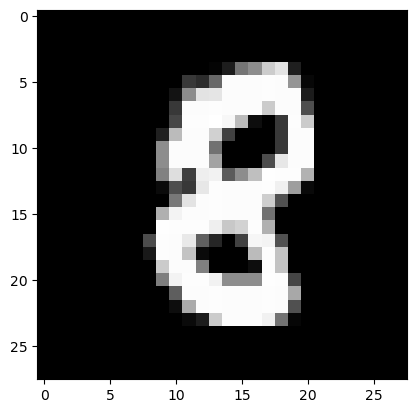

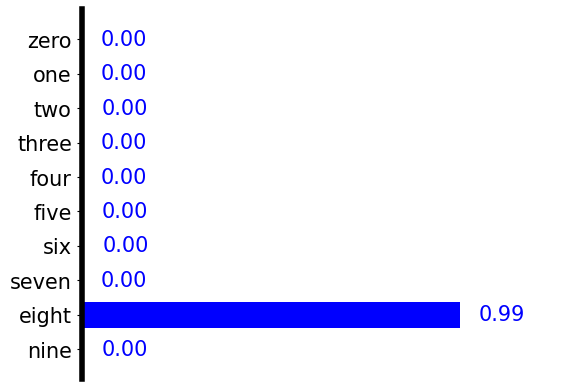

In [9]:
#Evaluate on random image
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= F.softmax(scores, dim=1)
utils.show_prob_mnist(probs)

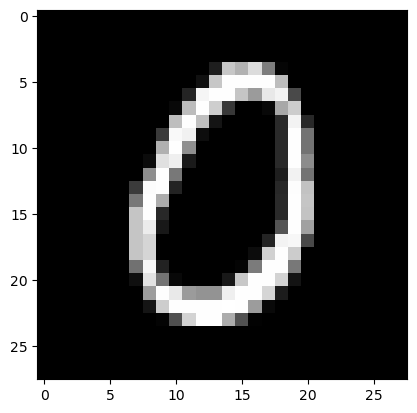

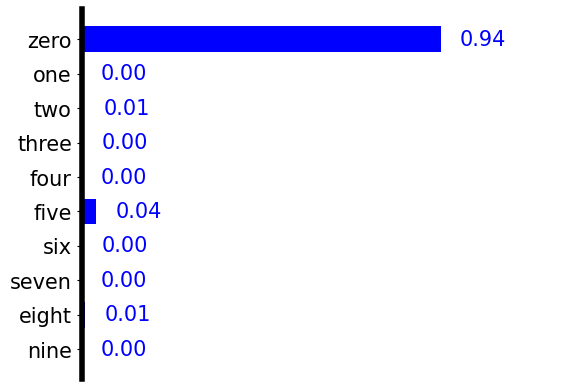

In [10]:
#Evaluate on random image
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= F.softmax(scores, dim=1)
utils.show_prob_mnist(probs)